# Regression model on cost feature

In [103]:
import pandas as pd
import numpy as np
import requests, io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, normalize

In [216]:
data = pd.read_csv('/content/data.csv')
data.drop('Unnamed: 0', axis = 1 , inplace= True)

In [217]:
data.drop(data.columns[0], axis = 1 , inplace= True)

In [180]:
data.head(10)

,apperance,goals,assists,yellow_card,2nd_ycard,red_card,min,apperance_NT,goals_NT,assists_NT,yellow_card_NT,2nd_ycard_NT,red_card_NT,min_NT,age,position,country,cost,National_Team
0,37,0,3,8,0,0,2947.0,6,0,1,0,0,0,152.0,Goalkeeper,23.0,Egypt,500000.0,1
1,130,5,5,15,1,0,10770.0,5,0,0,1,0,0,207.0,midfield,26.0,Egypt,500000.0,1
2,167,1,15,16,0,0,13304.0,6,0,1,1,0,0,424.0,midfield,21.0,Egypt,150000.0,1
3,15,3,0,2,0,0,341.0,0,0,0,0,0,0,0.0,attack,24.0,Egypt,200000.0,0
4,40,4,3,9,0,0,2478.0,9,1,1,1,0,0,487.0,midfield,19.0,Russia,250000.0,1
5,60,4,1,6,0,1,4788.0,0,0,0,0,0,0,0.0,defence,19.0,Italy,200000.0,0
6,213,17,21,20,1,0,14912.0,4,1,0,0,0,0,193.0,midfield,25.0,England,450000.0,1
7,68,5,4,6,2,0,4787.0,9,1,3,1,0,0,626.0,defence,24.0,Ukraine,400000.0,1
8,117,8,10,14,0,0,5788.0,0,0,0,0,0,0,0.0,attack,25.0,Ukraine,500000.0,0
9,49,14,3,12,0,1,3082.0,0,0,0,0,0,0,0.0,attack,25.0,Spain,400000.0,0


In [181]:
data.isna().sum()

apperance           0
goals               0
assists             0
yellow_card         0
2nd_ycard           0
red_card            0
min                 0
apperance_NT        0
goals_NT            0
assists_NT          0
yellow_card_NT      0
2nd_ycard_NT        0
red_card_NT         0
min_NT              0
age                 0
position            0
country           925
cost                0
National_Team       0
dtype: int64

#

### data preprocessing

In [219]:
data.rename(columns={'position':'Age'}, inplace= True)
data.rename(columns={'age':'position'}, inplace= True)
data.rename(columns={'Age':'age'}, inplace= True)

In [220]:
data.position.value_counts()

position
defence       8866
midfield      8422
attack        8400
Goalkeeper    2958
GoalKeeper       1
Name: count, dtype: int64

In [221]:
data.replace({'position':{'GoalKeeper':'Goalkeeper'}}, inplace= True)

In [185]:
data.shape

(28647, 19)

In [222]:
dummie = pd.get_dummies(data.position)

In [223]:
data = pd.concat([data, dummie], axis = 1)

In [224]:
data.drop(['country', 'position','red_card_NT','2nd_ycard_NT','yellow_card_NT','red_card','2nd_ycard','yellow_card'], axis= 1 , inplace= True)

In [225]:
data.head(2)

,apperance,goals,assists,yellow_card,2nd_ycard,red_card,min,apperance_NT,goals_NT,assists_NT,...,2nd_ycard_NT,red_card_NT,min_NT,age,cost,National_Team,Goalkeeper,attack,defence,midfield
0,37,0,3,8,0,0,2947.0,6,0,1,...,0,0,152.0,23.0,500000.0,1,True,False,False,False
1,130,5,5,15,1,0,10770.0,5,0,0,...,0,0,207.0,26.0,500000.0,1,False,False,False,True


In [226]:
data.skew().sort_values(ascending= False)

red_card_NT       31.589408
goals_NT          24.332324
assists_NT        19.598220
2nd_ycard_NT      14.659282
yellow_card_NT    10.471771
apperance_NT       7.668328
red_card           7.160984
goals              6.867819
assists            5.193607
2nd_ycard          2.999727
Goalkeeper         2.607147
yellow_card        2.163293
apperance          1.550298
min                1.525228
cost               1.340561
attack             0.908471
midfield           0.904406
National_Team      0.841109
defence            0.824249
min_NT           -19.687122
age                     NaN
dtype: float64

### outliers

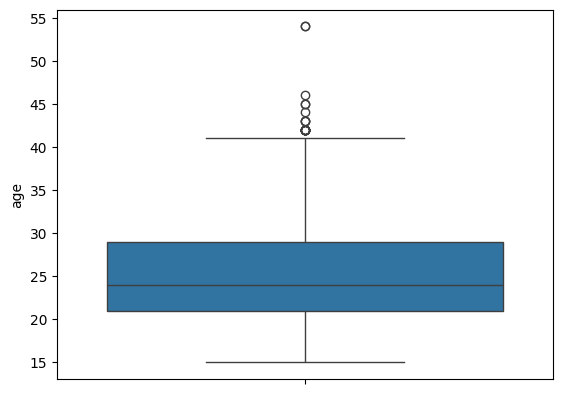

In [227]:
%matplotlib inline
s = sns.boxplot(data['age'])
plt.show()

In [228]:
ageOutliers = data[data.age > 38].index.tolist()

In [229]:
data.drop(ageOutliers, inplace= True)

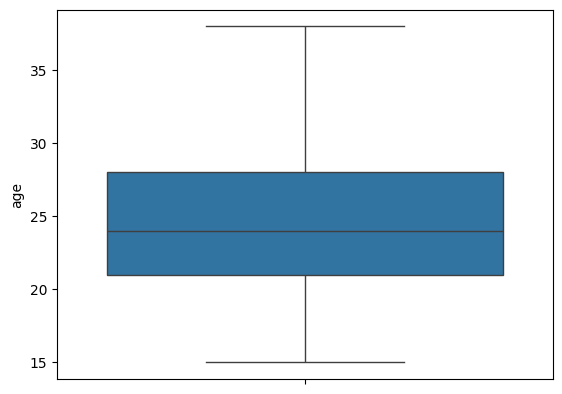

In [230]:
sns.boxplot(data.age)
plt.show()

In [231]:
data.skew().sort_values(ascending= False)

red_card_NT       32.688388
goals_NT          24.602625
assists_NT        19.799267
2nd_ycard_NT      14.839265
yellow_card_NT    10.379735
apperance_NT       7.764581
red_card           7.170527
goals              6.965683
assists            5.248064
2nd_ycard          3.003067
Goalkeeper         2.625486
yellow_card        2.153010
apperance          1.531736
min                1.496178
cost               1.336699
attack             0.908087
midfield           0.901783
National_Team      0.842782
defence            0.821932
age                0.532033
min_NT           -20.458556
dtype: float64

In [232]:
data.shape

(28524, 21)

#

## appling log transformatioin to high values 'skewed columns'

In [233]:
for i in ['goals_NT', 'assists_NT', 'apperance_NT']:
    data[i] += 10
    data[i] = np.log(data[i])

#

## Normailzing data

In [236]:
nordata = normalize(data[['cost','min','min_NT','apperance','age', 'goals','assists']])

In [237]:
xdata = pd.DataFrame(nordata,columns=['cost_','min_','min_NT_','apperance_','age_','goals_','assists_'])

In [238]:
data = pd.concat([data, xdata], axis=1)

In [239]:
data.drop(['cost','min','min_NT','apperance','age','goals','assists'], axis=1, inplace= True)

In [240]:
data.shape

(28647, 21)

In [241]:
data.dropna(inplace= True)

In [242]:
data.shape

(28401, 21)

#

In [243]:
X = data.drop('cost_', axis=1)
y = data.cost_

X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 75)

(19880, 20) (4260, 20) (4261, 20) (19880,) (4260,) (4261,)


In [245]:
X_train.shape

(22720, 20)

In [173]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [246]:
regressor.fit(X_train, y_train)

LinearRegression()

In [247]:
print(regressor.intercept_)

1.0138677010478565


In [248]:
y_pred = regressor.predict(X_test)

In [249]:
regressor.score(X_test, y_test)

0.7535663993039344

In [250]:
regressor.score(X_train, y_train)

0.7217443029975884

#

### Using Ridge (L2 Regularized) Regression Model

In [79]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=1, max_iter=1000, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, max_iter=1000, tol=0.1)

In [80]:
ridge_reg.score(X_test, y_test)

0.7584591669247539

In [81]:
ridge_reg.score(X_train, y_train)

0.7163467740328362

#

# XGBOOST ALGORITHMS

In [82]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [83]:
reg = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [23:17:44] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [84]:
pred = reg.predict(X_test)

In [85]:
reg.score(X_test, y_test)

0.989954682865676

In [86]:
reg.score(X_train, y_train)

0.9915467398630353

In [87]:
rmse = np.sqrt(MSE(y_test, pred))
rmse

0.00541905166253816

#  

# Neural Network

In [251]:
import tensorflow as tf

In [267]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

##Partition Data
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(19880, 20) (4260, 20) (4261, 20) (19880,) (4260,) (4261,)


In [301]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=(20,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [302]:
model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

In [298]:
X_train = X_train.reshape((X_train.shape[0],) + model.input_shape[1:])

In [ ]:
X_val = X_val.reshape((X_val.shape[0],) + model.input_shape[1:])

In [303]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=500)

Epoch 1/500
622/622 [==============================] - 2s 2ms/step - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0038 - val_mean_squared_error: 0.0038
Epoch 2/500
622/622 [==============================] - 1s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0020 - val_mean_squared_error: 0.0020
Epoch 3/500
622/622 [==============================] - 1s 2ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/500
622/622 [==============================] - 2s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 5/500
622/622 [==============================] - 2s 3ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 6/500
622/622 [==============================] - 1s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 7/500
622/622 [=

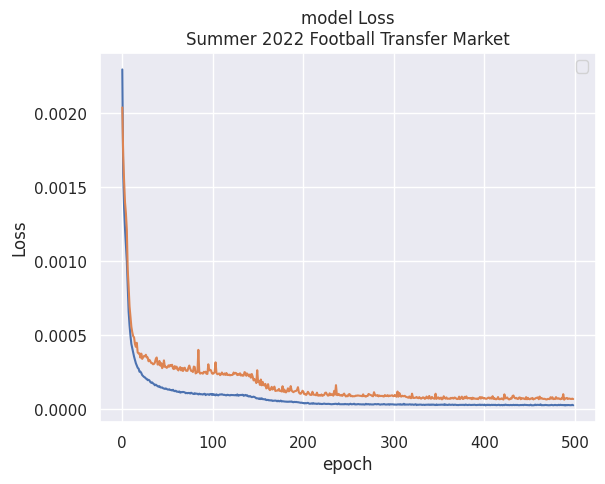

In [306]:
import seaborn as sns
sns.set_theme()
plt.title('model Loss\nSummer 2022 Football Transfer Market')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.plot(history.history['loss'][1:], label='training')
plt.plot(history.history['val_loss'][1:], label='validation')

In [305]:
model.evaluate(X_test, y_test)

134/134 [==============================] - 0s 1ms/step - loss: 2.0937e-05 - mean_squared_error: 2.0937e-05


[2.0937459339620546e-05, 2.0937459339620546e-05]